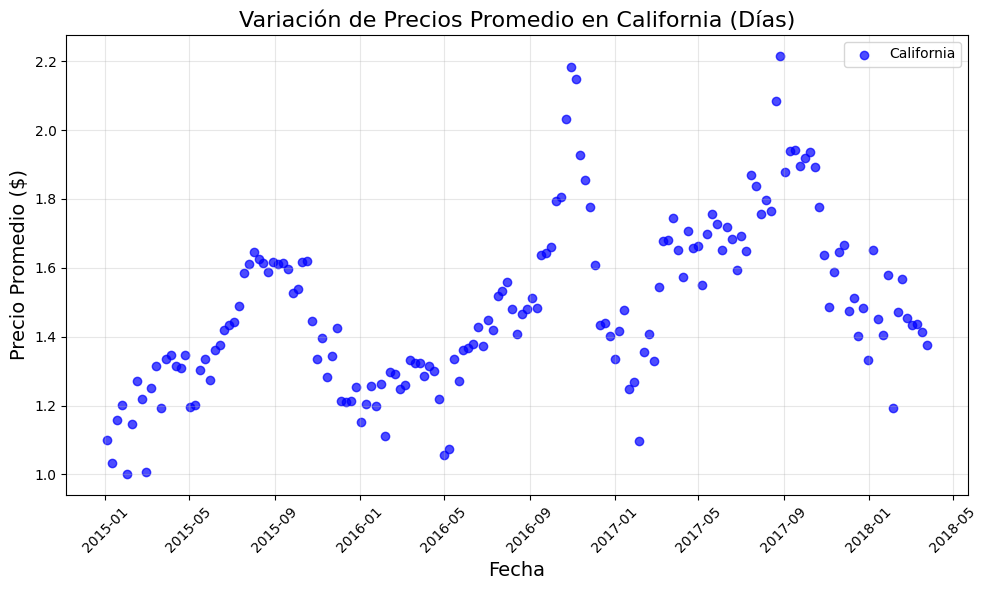

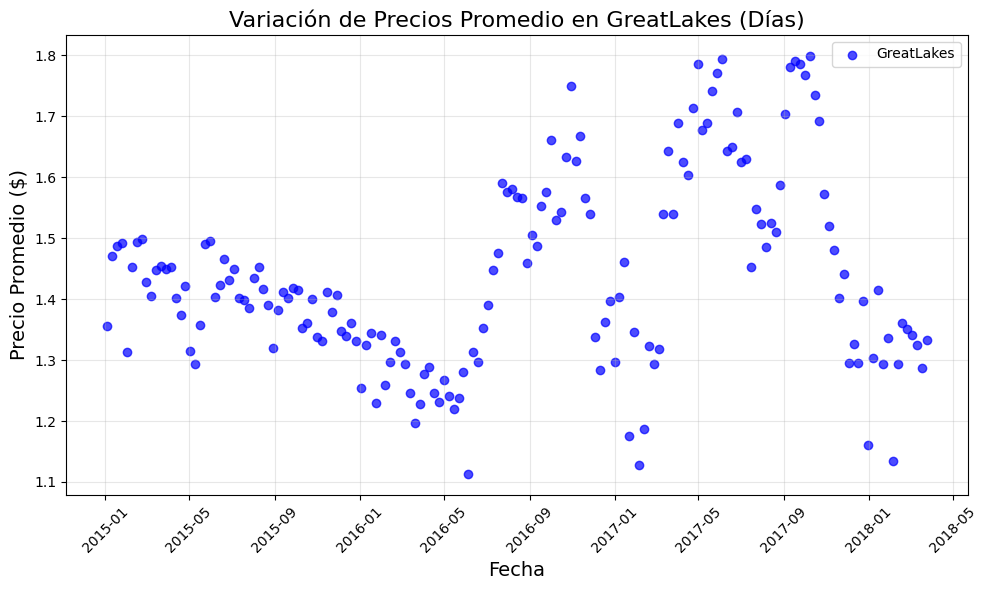

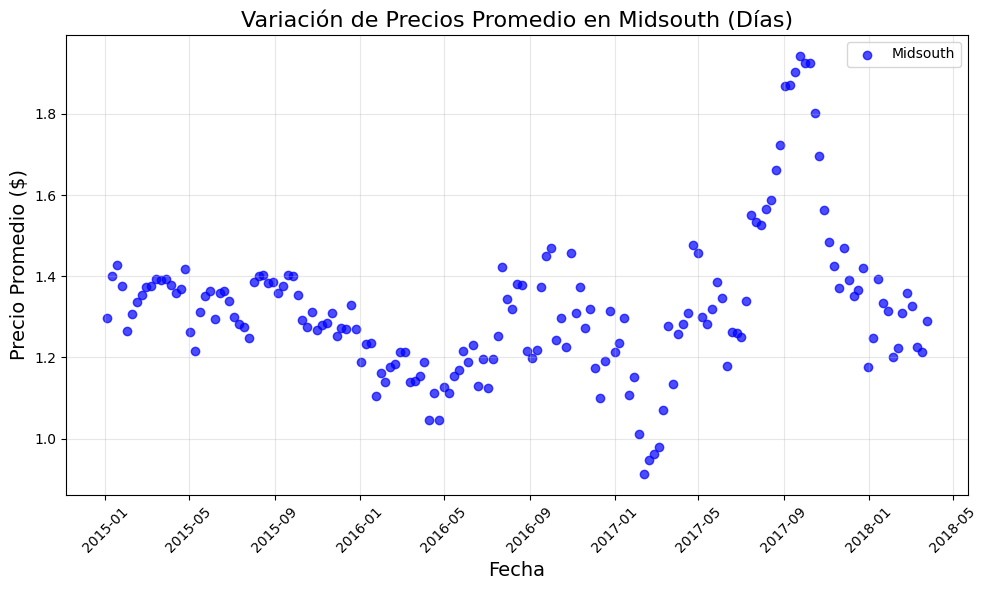

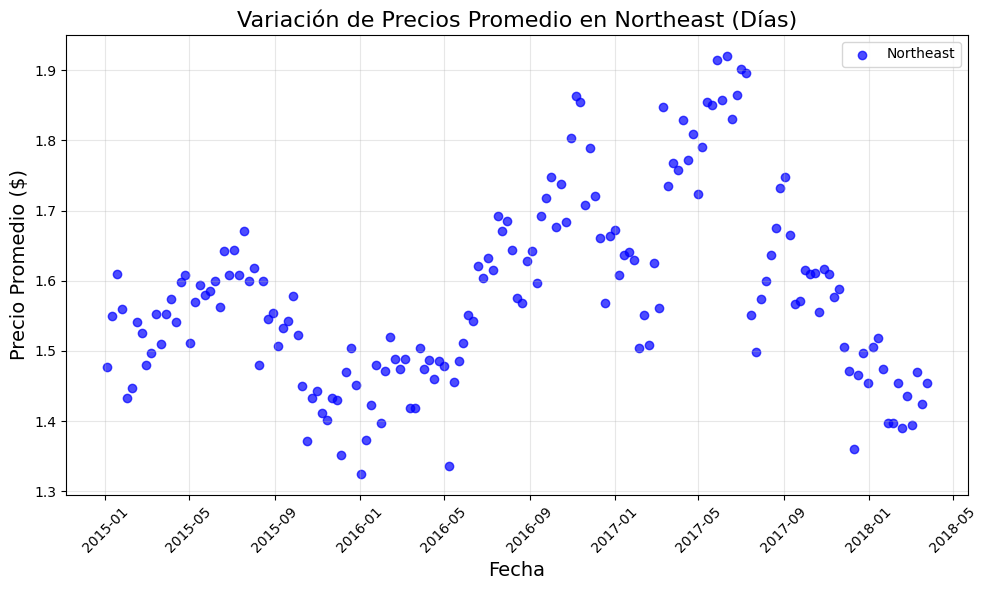

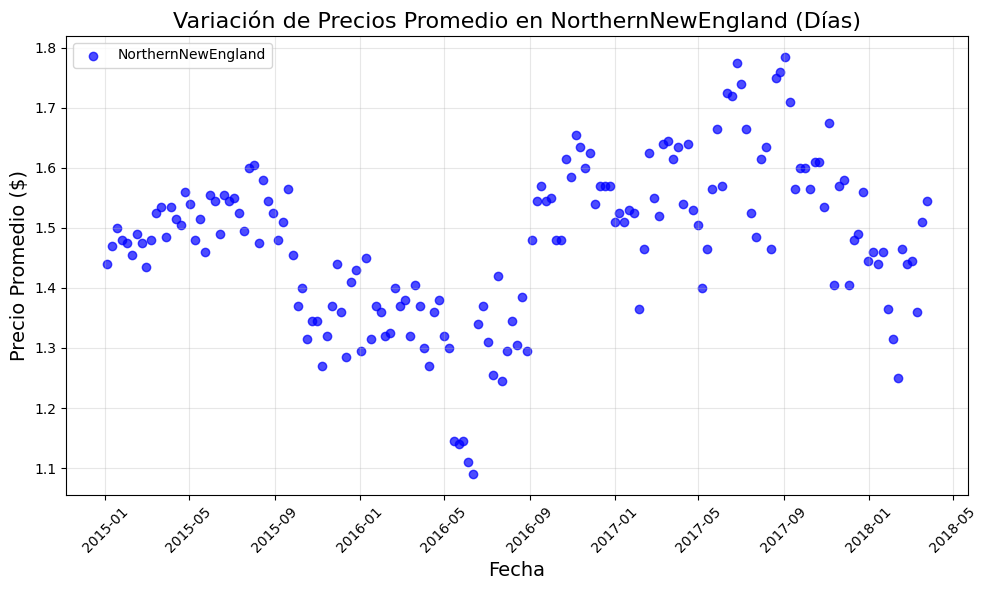

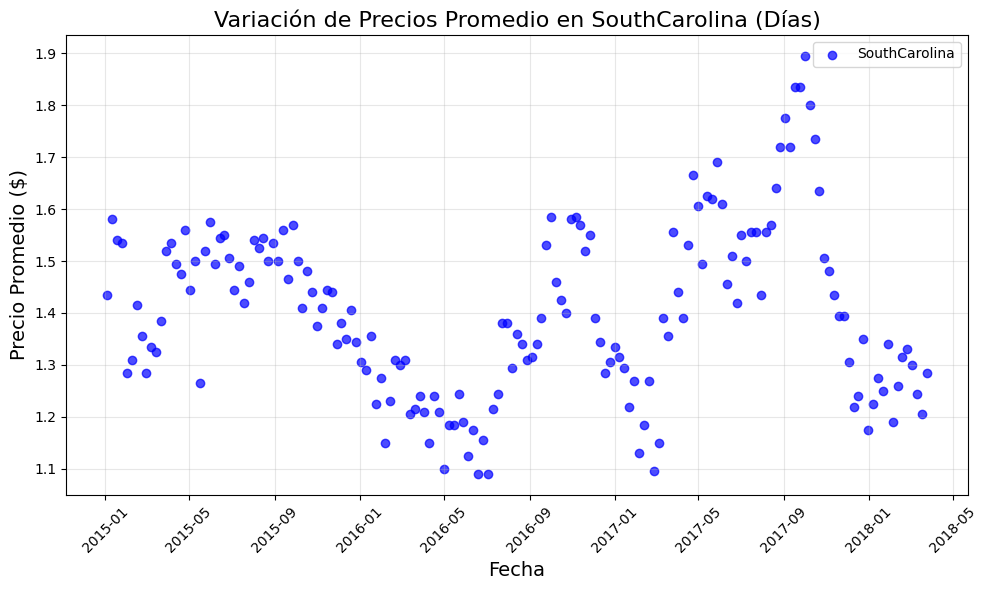

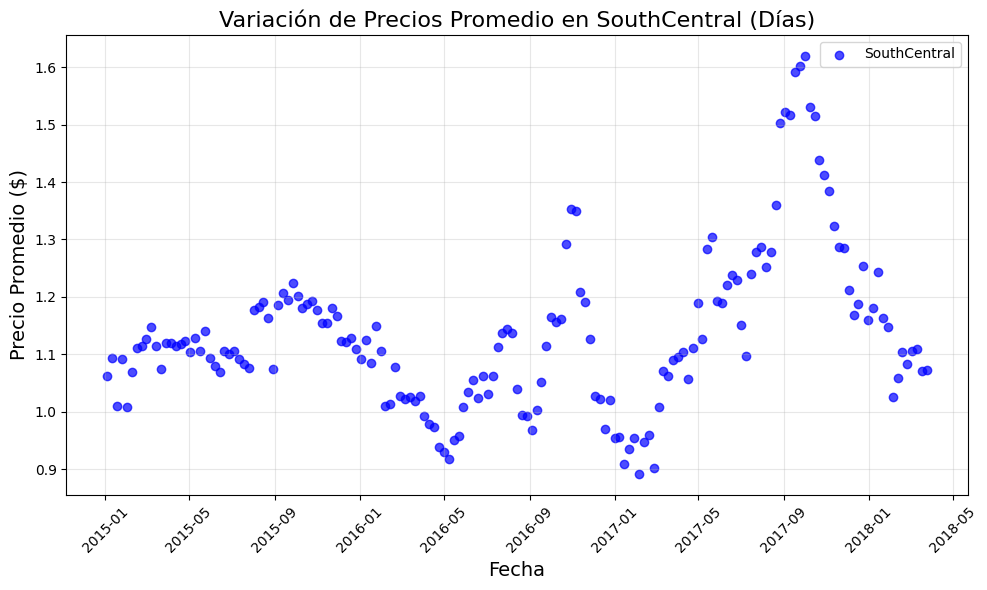

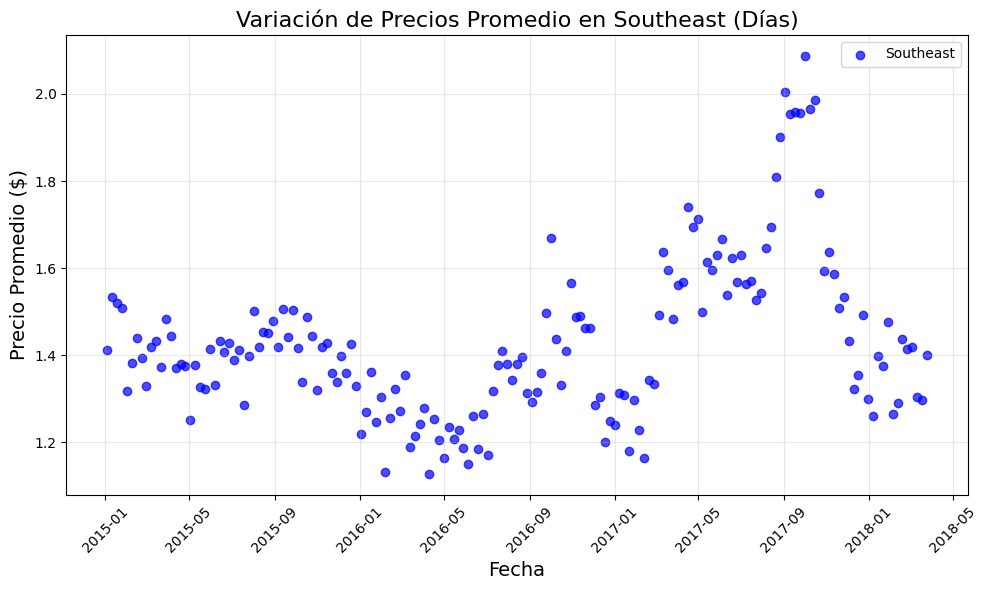

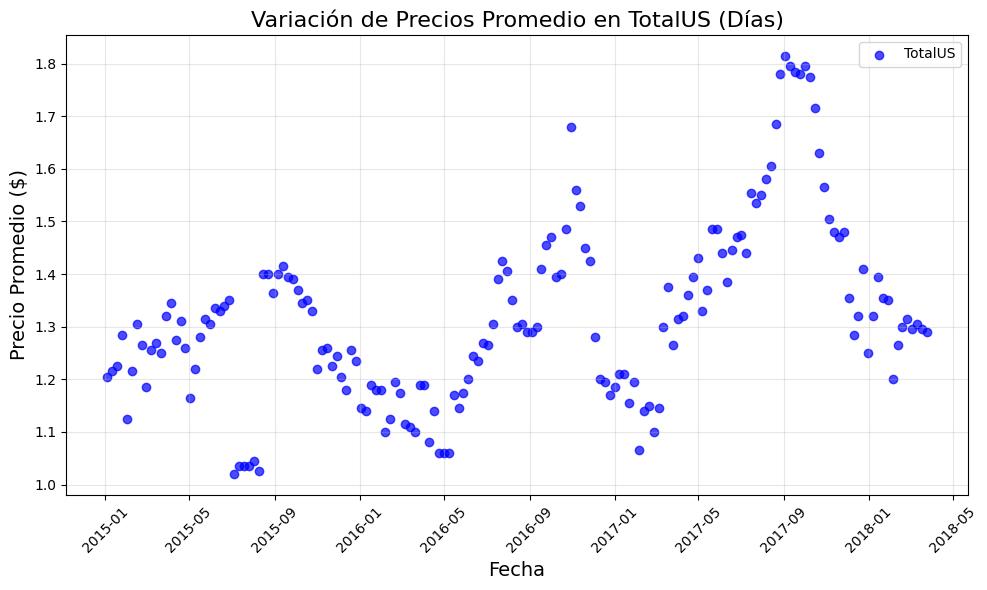

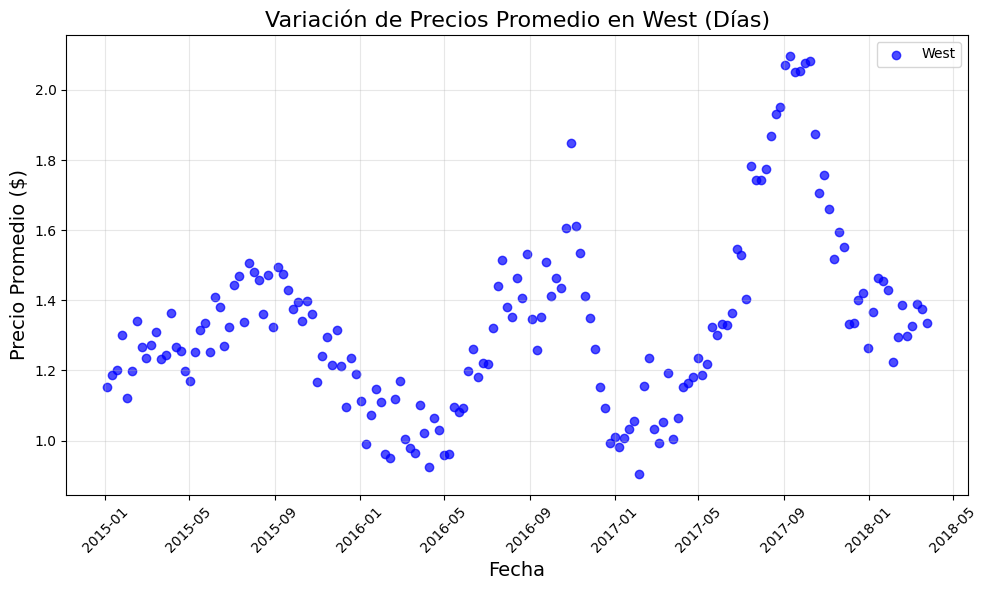

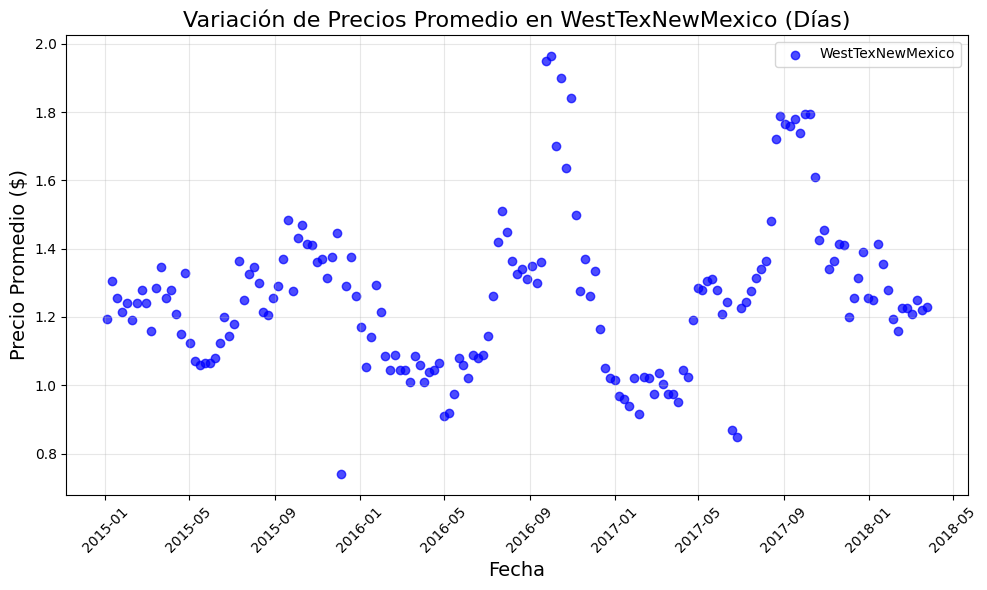

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mp 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose

advocado_data = pd.read_csv("avocado.csv")

# 2. Asegurarte de que la columna 'Date' sea de tipo datetime
advocado_data['Date'] = pd.to_datetime(advocado_data['Date'])

# 3. Crear un mapeo de regiones a broad regions (ajusta según tu dataset)
region_to_broad = {
    # California
    'LosAngeles': 'California',
    'SanDiego': 'California',
    'SanFrancisco': 'California',
    'Sacramento': 'California',

    # Great Lakes
    'Chicago': 'GreatLakes',
    'Detroit': 'GreatLakes',
    'Cleveland': 'GreatLakes',
    'BuffaloRochester': 'GreatLakes',
    'GrandRapids': 'GreatLakes',

    # Midsouth
    'Nashville': 'Midsouth',
    'Louisville': 'Midsouth',
    'CincinnatiDayton': 'Midsouth',
    'Indianapolis': 'Midsouth',
    'Columbus': 'Midsouth',

    # Northeast
    'NewYork': 'Northeast',
    'Boston': 'Northeast',
    'Philadelphia': 'Northeast',
    'HartfordSpringfield': 'Northeast',
    'HarrisburgScranton': 'Northeast',
    'Syracuse': 'Northeast',
    'Pittsburgh': 'Northeast',

    # Northern New England
    'NorthernNewEngland': 'NorthernNewEngland',

    # South Carolina
    'SouthCarolina': 'SouthCarolina',

    # South Central
    'DallasFtWorth': 'SouthCentral',
    'Houston': 'SouthCentral',
    'NewOrleansMobile': 'SouthCentral',
    'SouthCentral': 'SouthCentral',

    # Southeast
    'Atlanta': 'Southeast',
    'Charlotte': 'Southeast',
    'RaleighGreensboro': 'Southeast',
    'Jacksonville': 'Southeast',
    'Tampa': 'Southeast',
    'MiamiFtLauderdale': 'Southeast',
    'Orlando': 'Southeast',

    # West
    'Seattle': 'West',
    'Portland': 'West',
    'Spokane': 'West',
    'LasVegas': 'West',
    'PhoenixTucson': 'West',
    'West': 'West',

    # West Texas/New Mexico
    'WestTexNewMexico': 'WestTexNewMexico',
    'ElPaso': 'WestTexNewMexico',

    # Otras asignaciones
    'Albany': 'Northeast',  # Asignación basada en ubicación
    'BaltimoreWashington': 'Northeast',  # Región cercana
    'Boise': 'West',  # Región del oeste
    'Denver': 'West',  # Ubicación en el oeste
    'RichmondNorfolk': 'Southeast',  # Asignación lógica
    'Roanoke': 'Southeast',  # Ubicación cercana
    'Plains': 'Midsouth',  # Proximidad geográfica
    'StLouis': 'Midsouth',  # Ubicación central
    'California': 'California',  # Incluido en broad region
    'GreatLakes': 'GreatLakes',  # Incluido en broad region
    'Midsouth': 'Midsouth',  # Incluido en broad region
    'Northeast': 'Northeast',  # Incluido en broad region
    'SouthCentral': 'SouthCentral',  # Incluido en broad region
    'Southeast': 'Southeast',
    'TotalUS':'TotalUS'
}


# 4. Crear la columna `broad_region` basada en el mapeo
advocado_data['broad_region'] = advocado_data['region'].map(region_to_broad)

# 5. Agrupar por broad_region y Date, y calcular el promedio de AveragePrice
grouped_broad_df = advocado_data.groupby(['broad_region', 'Date'])['AveragePrice'].mean().reset_index()

# 6. Obtener las broad regions únicas
broad_regions = grouped_broad_df['broad_region'].unique()

# Definir frecuencias y etiquetas para iterar
frequencies = ['D']
frequency_labels = ['Días']

for freq, label in zip(frequencies, frequency_labels):
    # Agrupar por broad_region y frecuencia de tiempo
    grouped_data = advocado_data.groupby(['broad_region', pd.Grouper(key='Date', freq=freq)]).agg(AveragePrice=('AveragePrice', 'mean')
    ).reset_index()

    # Obtener las broad regions únicas
    broad_regions = grouped_data['broad_region'].unique()

    # Crear gráficos de dispersión para cada broad region
    for broad_region in broad_regions:
        region_data = grouped_data[grouped_data['broad_region'] == broad_region]
        plt.figure(figsize=(10, 6))
        plt.scatter(region_data['Date'], region_data['AveragePrice'], alpha=0.7, label=broad_region, color='blue')
        plt.title(f'Variación de Precios Promedio en {broad_region} ({label})', fontsize=16)
        plt.xlabel('Fecha', fontsize=14)
        plt.ylabel('Precio Promedio ($)', fontsize=14)
        plt.grid(alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.legend()
        plt.show()
